In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

training_data = pd.read_csv('../../data/numerai_training_data.csv', index_col='id')

In [14]:
# sampling
sampling_data = training_data.copy().sample(frac=0.3, random_state=1)
feature_names = [f for f in training_data.columns if "feature" in f]
X = sampling_data[feature_names]
y = sampling_data["target"]
X.isna().sum().sum(), y.isna().sum().sum()

(0, 0)

In [11]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[:10]

feature_intelligence8     0.035913
feature_intelligence4     0.033118
feature_intelligence1     0.030206
feature_intelligence11    0.018364
feature_dexterity11       0.016450
feature_constitution63    0.013644
feature_wisdom14          0.012839
feature_wisdom34          0.012568
feature_constitution2     0.012554
feature_wisdom35          0.011509
Name: MI Scores, dtype: float64

11


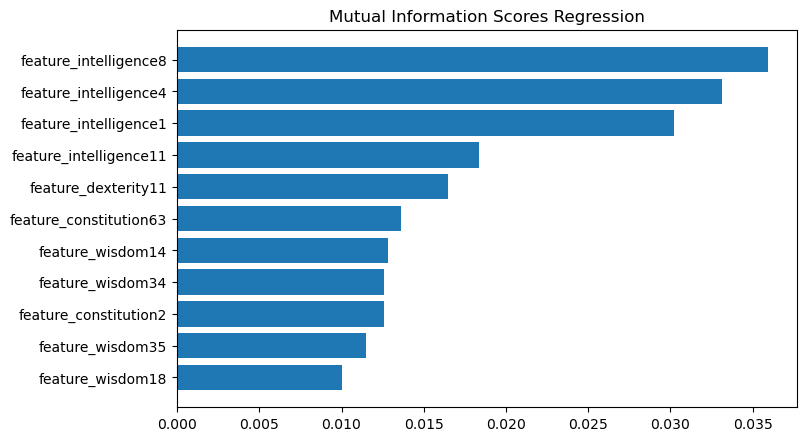

In [12]:
def plot_mi_scores(scores, title_info="Regression"):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title(f"Mutual Information Scores {title_info}")
plt.figure(dpi=100, figsize=(8, 5))
print(len(mi_scores.loc[mi_scores > 0.01]))
plot_mi_scores(mi_scores.loc[mi_scores > 0.01])
plt.savefig('./figures/mlscore_reg.png')

In [5]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

label_X = X.copy()
label_y = y.copy()

label_encoder = LabelEncoder()
label_encoder.fit([0, 0.25, 0.5, 0.75, 1])
for col in label_X.columns:
    label_X[col] = label_encoder.transform(label_X[col])
label_y = label_encoder.transform(label_y)

label_X.describe()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,...,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46
count,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,...,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000
mean,2.003992,2.003301,2.002604,2.001754,1.999920,2.000970,2.000897,2.002704,1.997994,1.998240,...,1.998652,1.997323,1.997675,2.002066,2.002385,1.998897,2.002816,1.999542,2.003786,2.002179
std,1.415548,1.415386,1.415155,1.417726,1.413551,1.415354,1.416876,1.417929,1.407205,1.407595,...,1.412693,1.412916,1.413747,1.402820,1.402881,1.407914,1.412519,1.402898,1.390353,1.412967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [17]:
from sklearn.feature_selection import mutual_info_classif

def make_classif_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_classif_mi_scores(label_X, label_y)
mi_scores[:10]

feature_intelligence8     0.037221
feature_intelligence4     0.033340
feature_intelligence1     0.030909
feature_intelligence11    0.022624
feature_dexterity11       0.015397
feature_wisdom35          0.014926
feature_wisdom14          0.014584
feature_constitution63    0.014359
feature_constitution2     0.014055
feature_constitution31    0.013977
Name: MI Scores, dtype: float64

27


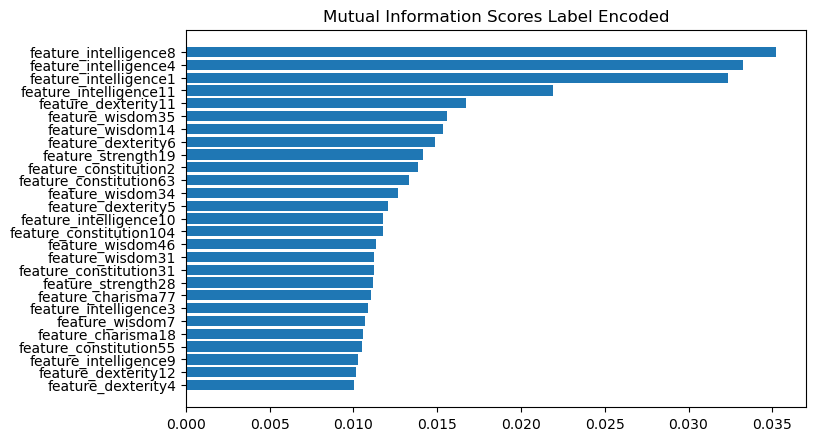

In [10]:
plt.figure(dpi=100, figsize=(8, 5))
print(len(mi_scores.loc[mi_scores > 0.01]))
plot_mi_scores(mi_scores.loc[mi_scores > 0.01], title_info="Label Encoded")
plt.savefig('./figures/mlscore_classif.png')

In [21]:
df = pd.DataFrame({'feature_name': mi_scores.loc[mi_scores > 0.01].index.tolist()})
df.to_csv('./mutual_info/selected.csv')